<strong><b><font size="5">Fonte: Data Science Academy</font></b></strong>

<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Forecasting - Previsões Para Séries Temporais - Modelo Base</font></b></strong>

<strong><b><font size="5">Modelo de Previsão de Capacidade</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade da DSA: www.datascienceacademy.com.br

A partir desta aula entraremos no incrível universo das previsões de séries temporais, uma habilidade valiosa e importante em praticamente qualquer área de negócio.

Serão diversas aulas e iremos estudar diferentes técnicas e modelos. Let's begin.

**Por que Forecasting é Importante?**

A previsão de séries temporais (chamado Forecasting) é uma área importante do aprendizado de máquina que geralmente é negligenciada.

É importante porque existem muitos problemas de previsão que envolvem um componente de tempo. Esses problemas são negligenciados porque é esse componente do tempo que dificulta o manuseio dos dados de séries temporais.

**O Tempo**

O tempo desempenha um papel básico, e muitas vezes irrelevante, nos conjuntos de dados que usamos em Machine Learning de forma tradicional (qualquer coisa que não seja série temporal).

São feitas previsões para novos dados quando o resultado real pode não ser conhecido até alguma data futura. O futuro está sendo previsto, mas todas as observações anteriores são quase sempre tratadas igualmente. Talvez com algumas dinâmicas temporais muito pequenas para superar a ideia de “desvio de conceito”, como usar apenas o último ano de observações em vez de todos os dados disponíveis.

Um conjunto de dados de séries temporais é diferente.

As séries temporais adicionam uma dependência explícita da ordem entre as observações: uma dimensão temporal.

Essa dimensão adicional é uma restrição e uma estrutura que fornece uma fonte de informações adicionais. E muito, muito valiosa.

**Descrevendo vs. Prevendo**

Temos objetivos diferentes, dependendo de estarmos interessados em entender um conjunto de dados ou fazer previsões.

A compreensão de um conjunto de dados, chamado análise de séries temporais, pode ajudar a fazer melhores previsões, mas não é necessária e pode resultar em um grande investimento técnico em tempo e experiência, não diretamente alinhados com o resultado desejado, que está prevendo o futuro.

Na modelagem descritiva ou análise de séries temporais, uma série temporal é modelada para determinar seus componentes em termos de padrões sazonais, tendências, relação a fatores externos e similares. Por outro lado, a previsão de séries temporais usa as informações em uma série temporal (talvez com informações adicionais) para prever valores futuros dessa série.

**Análise de Séries Temporais**

Ao usar estatísticas clássicas, a principal preocupação é a análise de séries temporais.

A análise de séries temporais envolve o desenvolvimento de modelos que melhor capturam ou descrevem uma série temporal observada para entender as causas. Este campo de estudo busca o "porquê" por trás de um conjunto de dados de séries temporais.

Isso geralmente envolve fazer suposições sobre a forma dos dados e decompor as séries temporais.

A qualidade de um modelo descritivo é determinada por quão bem ele descreve todos os dados disponíveis e a interpretação que fornece para melhor informar o domínio do problema.

O objetivo principal da análise de séries temporais é desenvolver modelos matemáticos que forneçam descrições plausíveis a partir de dados de amostra.

Isso é o que chamamos de Modelagem Estatística.

**Previsão de Séries Temporais**

Fazer previsões sobre o futuro é chamado de extrapolação no tratamento estatístico clássico de dados de séries temporais.

Os campos mais modernos se concentram no tópico e se referem a ele como previsão de séries temporais.

A previsão envolve ajustar os modelos aos dados históricos e usá-los para prever observações futuras.

Uma distinção importante na previsão é que o futuro está completamente indisponível e só deve ser estimado a partir do que já aconteceu.

O objetivo da análise de séries temporais é geralmente duplo: entender ou modelar os mecanismos estocásticos que dão origem a uma série observada e prever os valores futuros de uma série com base no histórico dessa série.

Isso é o que chamamos de Modelagem Preditiva.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [72]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [73]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

matplotlib 3.3.0
sklearn    0.23.1
numpy      1.16.6
pandas     1.0.5
Data Science Academy


## Definição do Problema de Negócio

Previsão de arrecadação de ICMS.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram a arrecadação de ICMS. Os dados tem registros dos anos de 2010 a 2015.

Será fornecido 1 dataset com 2 colunas, data e arrecadação de icms.


In [74]:
# Carrega os dados
dataframe = pd.read_csv("Arrecadacao_icms.csv")
dataframe['Data'] = pd.to_datetime(dataframe.Data, format = '%d/%m/%Y')
#dataframe = dataframe.set_index('Data')

In [75]:
# Dados
dataframe.head()

,Data,Arrecadacao
0,2010-01-01,3299311
1,2010-02-01,2415158
2,2010-03-01,2613292
3,2010-04-01,2533679
4,2010-05-01,2426702


In [76]:
dataframe.dtypes

Data           datetime64[ns]
Arrecadacao             int64
dtype: object

In [77]:
dataframe.shape

(96, 2)

## Análise Exploratória dos Dados

Vamos preparar os dados e realizar diversas análises a fim de identificar possíveis padrões nos dados que ajudem mais tarde na criação do modelo preditivo.

In [78]:
# Refinamos os dados para o gráfico da série original

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dataframe['Arrecadacao']

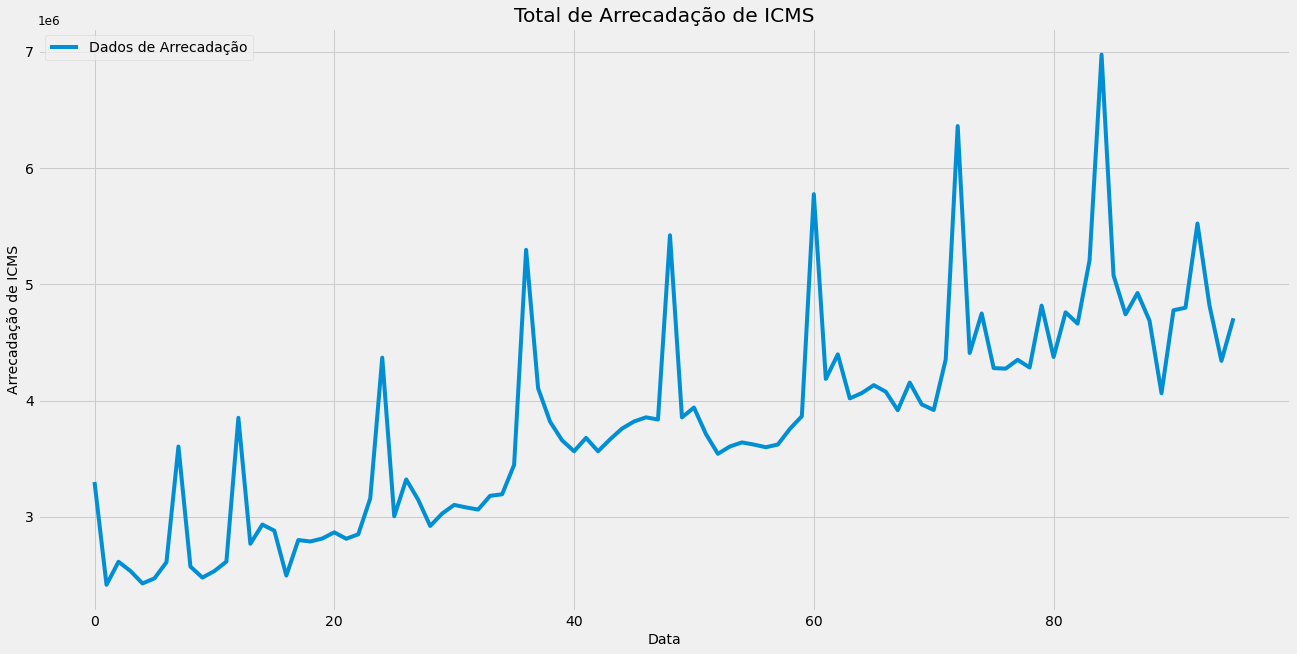

In [79]:
# Plot
target.plot(title = 'Total de Arrecadação de ICMS', fontsize = 14, label = 'Dados de Arrecadação') 
plt.xlabel("Data") 
plt.ylabel("Arrecadação de ICMS") 
plt.legend(loc = 'best') 
plt.show()

In [80]:
# Vamos extrair os detalhes da coluna Day: ano, mês e dia 
for i in (dataframe,):
    i['ano'] = i.Data.dt.year
    i['mes'] = i.Data.dt.month
    i['dia'] = i.Data.dt.day

In [81]:
# Dados
dataframe.head()

,Data,Arrecadacao,ano,mes,dia
0,2010-01-01,3299311,2010,1,1
1,2010-02-01,2415158,2010,2,1
2,2010-03-01,2613292,2010,3,1
3,2010-04-01,2533679,2010,4,1
4,2010-05-01,2426702,2010,5,1


In [82]:
# Verifica os tipos de dados
dataframe.dtypes

Data           datetime64[ns]
Arrecadacao             int64
ano                     int64
mes                     int64
dia                     int64
dtype: object

#### Dados de Treino

In [83]:
# Os dados de treino serão divididos em dados de treino e teste.
# Observe que os registros são separados em ordem cronológica.
dados_treino = dataframe.iloc[0:72]
dados_teste = dataframe.iloc[72:]
print(len(treino), len(teste))

72 24


Vamos fazer algumas transformações nos dados para poder criar alguns gráficos e verificar se temos algum padrão disponível.

In [84]:
# Converte a coluna Day para o tipo correto
dados_treino['Data'] = pd.to_datetime(dados_treino.Data, format = '%d/%m/%Y')

In [85]:
# Vejamos como ficou o dataset
dados_treino.head()

,Data,Arrecadacao,ano,mes,dia
0,2010-01-01,3299311,2010,1,1
1,2010-02-01,2415158,2010,2,1
2,2010-03-01,2613292,2010,3,1
3,2010-04-01,2533679,2010,4,1
4,2010-05-01,2426702,2010,5,1


In [86]:
# Verifica os tipos de dados
dados_treino.dtypes

Data           datetime64[ns]
Arrecadacao             int64
ano                     int64
mes                     int64
dia                     int64
dtype: object

In [87]:
# Converte a coluna Day para o tipo correto
dados_teste['Data'] = pd.to_datetime(dados_teste.Data, format = '%d/%m/%Y')

In [88]:
# Verifica os tipos de dados
dados_treino.dtypes

Data           datetime64[ns]
Arrecadacao             int64
ano                     int64
mes                     int64
dia                     int64
dtype: object

In [89]:
# Vejamos como ficou o dataset
dados_treino.head()

,Data,Arrecadacao,ano,mes,dia
0,2010-01-01,3299311,2010,1,1
1,2010-02-01,2415158,2010,2,1
2,2010-03-01,2613292,2010,3,1
3,2010-04-01,2533679,2010,4,1
4,2010-05-01,2426702,2010,5,1


In [90]:
# Vejamos como ficou o dataset
dados_treino.head()

,Data,Arrecadacao,ano,mes,dia
0,2010-01-01,3299311,2010,1,1
1,2010-02-01,2415158,2010,2,1
2,2010-03-01,2613292,2010,3,1
3,2010-04-01,2533679,2010,4,1
4,2010-05-01,2426702,2010,5,1


In [91]:
# Precisamos do dia da semana também
dataframe['dia_semana'] = dataframe['Data'].dt.dayofweek

In [92]:
# Seria bom verificar se o fato de ser final de semana ou não impacta no percentual de ocupação do File System. 
# Vamos extrair essa informação. Dias da semana iguais a 5 ou 6 são sábado e domingo.

# Criamos uma função, onde marcamos final de semana como 1 e dias úteis como 0
def converteFimSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [93]:
# Agora aplicamos a função
dados_treino['final_semana'] = dados_treino['Data'].apply(converteFimSemana)

In [94]:
# Vejamos como ficou o dataset
dados_treino.head()

,Data,Arrecadacao,ano,mes,dia,final_semana
0,2010-01-01,3299311,2010,1,1,0
1,2010-02-01,2415158,2010,2,1,0
2,2010-03-01,2613292,2010,3,1,0
3,2010-04-01,2533679,2010,4,1,0
4,2010-05-01,2426702,2010,5,1,1


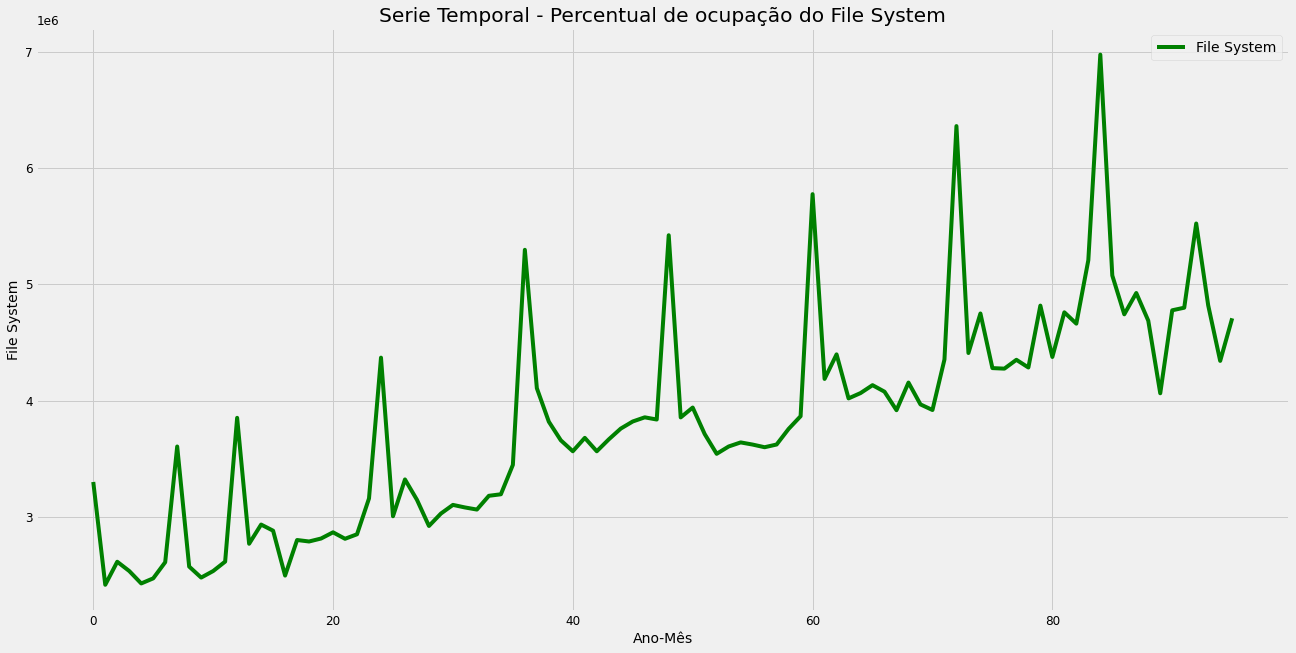

In [95]:
# Plot
plt.title("Serie Temporal - Percentual de ocupação do File System")
plt.plot(target, label = "File System", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("File System")
plt.legend(loc = "best")

Percebemos que há claramente uma tendência de aumento no percentual de File System ao longo do tempo. Vamos extrair mais detalhes com outros graficos.

<AxesSubplot:xlabel='dia'>

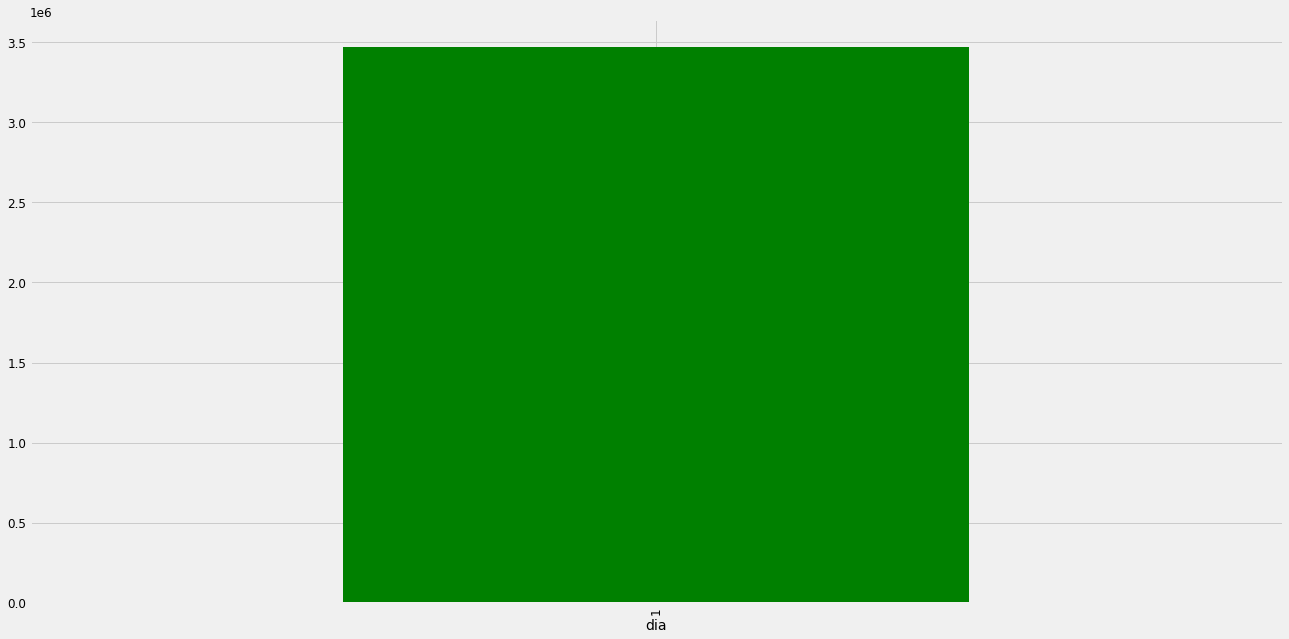

In [96]:
# E qual será a média diária por dia do mês? Vamos checar.
# O dia do mês não parece ser relevante para a demanda.
dados_treino.groupby('dia')['Arrecadacao'].mean().plot.bar(color = 'green')

In [97]:
# Vamos descer mais um nível e analisar a demanda média por hora.
# Como era de se esperar, na madrugada a média é menor do que em outras horas do dia.
#dados_treino.groupby('hora')['Count'].mean().plot.bar(color = 'green')

Vamos criar um gráfico com 3 séries representando o percentual de File System por mês, por semana e por dia para confirmar a tendência de crescimento.

In [98]:
# Coletamos o Timestamp da coluna Datetime
dados_treino.Timestamp = pd.to_datetime(dados_treino.Data, format = '%d/%m/%y')

# Colocamos o Timestamp como índice da série
dados_treino.index = dados_treino.Timestamp

In [99]:
# Série temporal da média de demanda de transporte por mês
seria_media_mes = dados_treino.resample('M').mean()

# Série temporal da média de demanda de transporte por semana
seria_media_semana = dados_treino.resample('W').mean() 

# Série temporal da média de demanda de transporte por dia
seria_media_dia = dados_treino.resample('D').mean() 

# Série temporal da média de demanda de transporte por hora
seria_media_hora = dados_treino.resample('H').mean() 

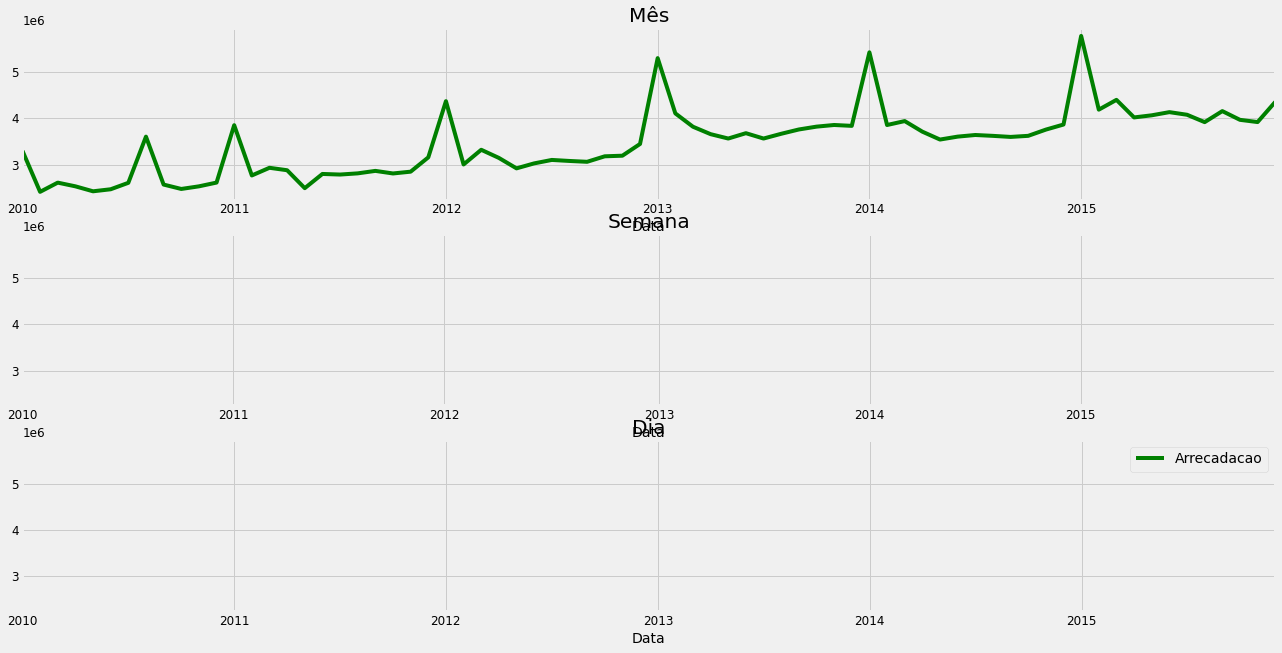

In [100]:
# Plot
fig, axs = plt.subplots(3,1) 
seria_media_mes.Arrecadacao.plot(title = 'Mês', fontsize = 12, ax = axs[0], color = 'green') 
seria_media_semana.Arrecadacao.plot(title = 'Semana', fontsize = 12, ax = axs[1], color = 'green') 
seria_media_dia.Arrecadacao.plot(title = 'Dia', fontsize = 12, ax = axs[2], color = 'green') 
plt.legend(loc = "best")
plt.show()

# Fim